In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import glob
import datetime
from sklearn import preprocessing
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Load filelist into python list object files. Replace path_to_csvfiles with location of your files.
path_to_csvfiles = 'Data/'
files = glob.glob(path_to_csvfiles+'*.csv')

# Import each CSV to a separate dataframe and store in python list dfs. Add a column for tester info.
dfs = []
for csv in files:
    frame = pd.read_csv(csv, header=None, skiprows=[0], index_col=2, parse_dates=True)
    dfs.append(frame)

# Concatenate all CSV data into one large dataframe, clean it up
df = pd.concat(dfs, ignore_index=False)
delta = pd.to_timedelta(df.groupby(level=0).cumcount(), unit='s')
df.index = df.index + delta # Adds 1 second to all identical datetimes so that index will not have any duplicate values
df.index.rename('Date', inplace=True)
df['setting'] = df[3].str[0:2]
df['burner'] = df[3].str.extract(r'([A-Z]\d)')
df.drop(columns=[0,1,3,8,10,11,13,14], inplace=True)
df.rename(columns={4:'sn', 
                   5:'model', 
                   6:'tester', 
                   7:'pass', 
                   9:'flowrate',
                   12:'upr-lim',
                   15:'lwr-lim'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7335 entries, 2020-10-01 15:25:00 to 2020-12-09 05:36:03
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        7335 non-null   int64  
 1   model     7335 non-null   object 
 2   tester    7335 non-null   object 
 3   pass      7335 non-null   bool   
 4   flowrate  7335 non-null   float64
 5   upr-lim   7335 non-null   float64
 6   lwr-lim   7335 non-null   float64
 7   setting   7335 non-null   object 
 8   burner    7329 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 522.9+ KB


In [5]:
df['burner'].unique()

array(['B1', 'B2', 'B3', 'B4', 'C1', 'G1', 'B5', 'B6', 'G2', 'B7', 'B8',
       nan], dtype=object)

In [8]:
# Create data subsets
griddles = df[(df['burner'] == 'G1') | (df['burner'] == 'G2')]
griddles = griddles.loc[griddles['flowrate'] > 5] # removing outlier values

chars = df[(df['burner'] == 'C1')]

mainhigh = df[df['setting'] == 'MH']
mainlow = df[df['setting'] == 'ML']
simmerhigh = df[df['setting'] == 'SH']
simmerlow = df[df['setting'] == 'SL']

fail = df['pass'] == False
testfails = df[fail]

In [120]:
testfails.groupby(['setting', 'burner']).count()

sn  model  tester  pass  flowrate  upr-lim  lwr-lim
setting burner                                                     
MH      B1      54     54      54    54        54       54       54
        B2      25     25      25    25        25       25       25
        B3      19     19      19    19        19       19       19
        B4      16     16      16    16        16       16       16
        B5      15     15      15    15        15       15       15
        B6      10     10      10    10        10       10       10
        B7       1      1       1     1         1        1        1
        B8       1      1       1     1         1        1        1
        C1       4      4       4     4         4        4        4
        G1       6      6       6     6         6        6        6
ML      B1      51     51      51    51        51       51       51
        B2      21     21      21    21        21       21       21
        B3      19     19      19    19        19       19       19
        B4      16     16      16    16        16       16       16
        B5      15     15      15    15        15       15       15
        B6      10     10      10    10        10       10       10
        B7       1      1       1     1         1        1        1
        B8       1      1       1     1         1        1        1
        C1       4      4       4     4         4        4        4
SH      B1      51     51      51    51        51       51       51
        B2      21     21      21    21        21       21       21
        B3      19     19      19    19        19       19       19
        B4      16     16      16    16        16       16       16
        B5      15     15      15    15        15       15       15
        B6      10     10      10    10        10       10       10
        B7       1      1       1     1         1        1        1
        B8       1      1       1     1         1        1        1
SL      B1      51     51      51    51        51       51       51
        B2      21     21      21    21        21       21       21
        B3      18     18      18    18        18       18       18
        B4      16     16      16    16        16       16       16
        B5      14     14      14    14        14       14       14
        B6       9      9       9     9         9        9        9
        B7       1      1       1     1         1        1        1
        B8       1      1       1     1         1        1        1

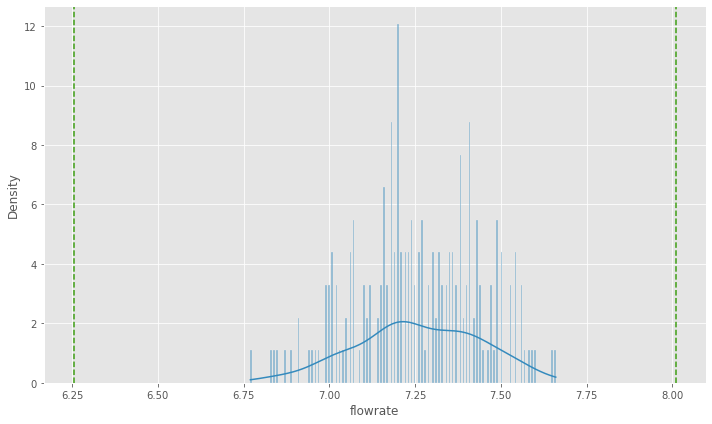

In [85]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.histplot(regulators['flowrate'], 
             bins=200, 
             kde=True, 
             ax=ax, 
             stat='density')
#plt.xlim(6, 8.1)

ax.axvline(x=regulators['lwr-lim'][0], ls='--', c='#3c9e12')
ax.axvline(x=regulators['upr-lim'][0], ls='--', c='#3c9e12')

plt.tight_layout()